In [19]:
import numpy as np
from impls import *
from matplotlib import pyplot as plt

### Load and split data

In [20]:
X_train, y_train = np.loadtxt('../data/train.dat', usecols=(0,1), unpack=True)
X_test, y_test = np.loadtxt('../data/test.dat', usecols=(0,1), unpack=True)

X_train = X_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)

X_test = X_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)

# print(X_train[:5], y_train[:5], sep='\n\n')

### Perform 6-fold cross validation on linear regressor for each degree d in [0,12]

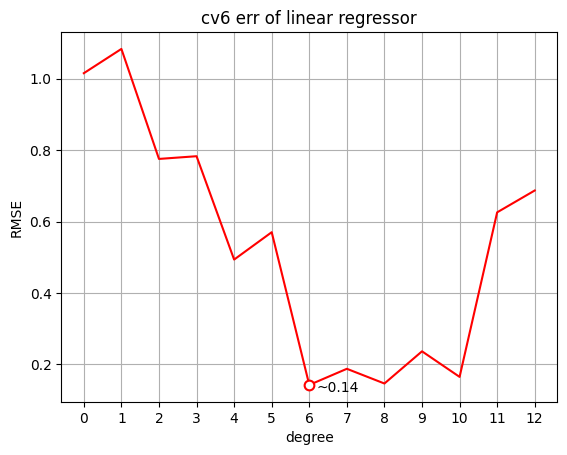

In [60]:
# reg_term = 0
k = 6
max_d = 12

degree = list(range(max_d+1))
cv_err = list()
test_err = list()
for d in degree:
    model = OutputScalingWrapper(
        Pipeline(
            StandardScaler(),
            PolynomialFeatures(degree=d),
            StandardScaler(),
            # RidgeRegressor(λ=reg_term)
            LinearRegressor()
        )
    )
    
    cv_err.append(
        cross_val_score(model, X_train, y_train, k)
    )
    
    model.fit(X_train, y_train)
    test_err.append(model.score(X_test, y_test))

def plot(y, label, clr, show_min=True):
    plt.plot(degree, y, label=label, color=clr)
    i = y.index(min(y))
    if not show_min:
        return
    plt.text(degree[i]+0.2, y[i]-0.02, f'~{y[i]:.2f}')
    plt.plot(degree[i], y[i], 
        marker='o', 
        markerfacecolor='white', 
        markeredgecolor=clr, 
        markersize=7,
        markeredgewidth=1.5
    )

plot(cv_err, 'cv err', 'red')

plt.xticks(degree)
plt.xlabel('degree')
plt.ylabel('RMSE')
plt.title(f'cv6 err of linear regressor')
plt.grid()
plt.show()

### Fit model using optimal degree

In [ ]:
d = 6
